In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import folium
from plotnine import *

In [203]:
total_people=pd.read_csv("total people.csv", encoding='euc-kr')
old_people=pd.read_csv("old people.csv", encoding='euc-kr')
goryeong=pd.read_csv("goryeong.csv", encoding='euc-kr')

In [74]:
import matplotlib
from matplotlib import font_manager, rc
import platform
if platform.system()=="Windows":
    font_name=font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
matplotlib.rcParams['axes.unicode_minus']=False

In [75]:
total_people.index=total_people['행정구역']
total_people=total_people.drop(['행정구역'], axis=1)

In [76]:
total_people['2008']=pd.to_numeric(total_people["2008"].str.replace(",",""), errors='coerce')
total_people['2009']=pd.to_numeric(total_people["2009"].str.replace(",",""), errors='coerce')
total_people['2010']=pd.to_numeric(total_people["2010"].str.replace(",",""), errors='coerce')
total_people['2011']=pd.to_numeric(total_people["2011"].str.replace(",",""), errors='coerce')
total_people['2012']=pd.to_numeric(total_people["2012"].str.replace(",",""), errors='coerce')
total_people['2013']=pd.to_numeric(total_people["2013"].str.replace(",",""), errors='coerce')
total_people['2014']=pd.to_numeric(total_people["2014"].str.replace(",",""), errors='coerce')
total_people['2015']=pd.to_numeric(total_people["2015"].str.replace(",",""), errors='coerce')
total_people['2016']=pd.to_numeric(total_people["2016"].str.replace(",",""), errors='coerce')
total_people['2017']=pd.to_numeric(total_people["2017"].str.replace(",",""), errors='coerce')
total_people['2018']=pd.to_numeric(total_people["2018"].str.replace(",",""), errors='coerce')


In [77]:
total_people
total_people.drop(columns=['2008','2009','2010','2011'], inplace=True)

In [78]:
total_people
total=total_people.loc['전국']
total

2012    50948272
2013    51141463
2014    51327916
2015    51529338
2016    51696216
2017    51778544
2018    51826059
Name: 전국, dtype: int64

In [79]:
# old_people.index=old_people['행정구역']
# old_people=old_people.drop(['행정구역'], axis=1)|
# old_people["2008"].str.replace(",","")

In [80]:
old_people['2008']=pd.to_numeric(old_people["2008"].str.replace(",",""), errors='coerce')
old_people['2009']=pd.to_numeric(old_people["2009"].str.replace(",",""), errors='coerce')
old_people['2010']=pd.to_numeric(old_people["2010"].str.replace(",",""), errors='coerce')
old_people['2011']=pd.to_numeric(old_people["2011"].str.replace(",",""), errors='coerce')
old_people['2012']=pd.to_numeric(old_people["2012"].str.replace(",",""), errors='coerce')
old_people['2013']=pd.to_numeric(old_people["2013"].str.replace(",",""), errors='coerce')
old_people['2014']=pd.to_numeric(old_people["2014"].str.replace(",",""), errors='coerce')
old_people['2015']=pd.to_numeric(old_people["2015"].str.replace(",",""), errors='coerce')
old_people['2016']=pd.to_numeric(old_people["2016"].str.replace(",",""), errors='coerce')
old_people['2017']=pd.to_numeric(old_people["2017"].str.replace(",",""), errors='coerce')
old_people['2018']=pd.to_numeric(old_people["2018"].str.replace(",",""), errors='coerce')

In [81]:
old_people

,행정구역,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
0,전국,7110229.0,7401159.0,7782587.0,8020279.0,8408663,8737654,9147370,9656763,10134728,10666349,11193257
1,서울특별시,1342702.0,1408317.0,1504667.0,1543069.0,1619521,1683046,1759482,1847676,1923213,2006472,2084246
2,부산광역시,538619.0,565237.0,599836.0,623335.0,657106,686144,720268,762654,798789,837866,874182
3,대구광역시,331818.0,347399.0,366227.0,380433.0,401870,419926,438702,462409,485662,510382,532908
4,인천광역시,311800.0,327442.0,346561.0,360437.0,384237,404699,429563,461292,490540,523893,558602
5,광주광역시,171348.0,180378.0,190347.0,197801.0,207611,215273,224771,236357,246989,259819,272334
6,대전광역시,170873.0,179141.0,189437.0,196937.0,207941,217453,229976,243621,257327,271745,285272
7,울산광역시,104563.0,110475.0,118181.0,124893.0,133844,142401,152208,164509,175893,188429,201236
8,세종특별자치시,NaN,NaN,NaN,NaN,22906,23913,26728,31351,34910,39401,43947
9,경기도,1306582.0,1371321.0,1456012.0,1509529.0,1601518,1681601,1780595,1912653,2044471,2188530,2346568


In [82]:
# old_people.loc['전국'].plot()

In [83]:
old_people.info()
type(old_people)
old_people.drop(columns=['2008','2009','2010','2011'], inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18 entries, 0 to 17
Data columns (total 12 columns):
행정구역    18 non-null object
2008    17 non-null float64
2009    17 non-null float64
2010    17 non-null float64
2011    17 non-null float64
2012    18 non-null int64
2013    18 non-null int64
2014    18 non-null int64
2015    18 non-null int64
2016    18 non-null int64
2017    18 non-null int64
2018    18 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 1.8+ KB


In [86]:
old_people.index=old_people['행정구역']
old_people=old_people.drop(['행정구역'], axis=1)

KeyError: '행정구역'

In [88]:
old=old_people.loc['전국']
old

2012     8408663
2013     8737654
2014     9147370
2015     9656763
2016    10134728
2017    10666349
2018    11193257
Name: 전국, dtype: int64

In [110]:
total_old=pd.concat([total,old], axis=1)
# old=pd.DataFrame(old)
# total=pd.DataFrame(total)
# old
total_old.columns=["전국인구","노인인구"]
total_old

,전국인구,노인인구
2012,50948272,8408663
2013,51141463,8737654
2014,51327916,9147370
2015,51529338,9656763
2016,51696216,10134728
2017,51778544,10666349
2018,51826059,11193257


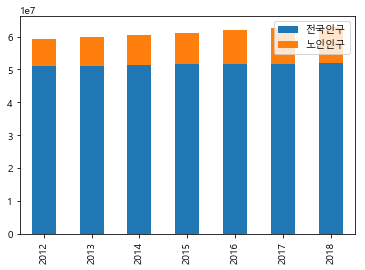

In [130]:
import numpy as np
from matplotlib import pyplot
import seaborn as sns

total_old_bar=total_old.plot(kind="bar", stacked=True)

In [131]:
total_old_per=(old/total)*100
total_old_per_df=pd.DataFrame(total_old_per)
total_old_per_df.columns=["노인인구 비율"]

In [132]:
total_old_per_df

,노인인구 비율
2012,16.504314
2013,17.085264
2014,17.821433
2015,18.740320
2016,19.604390
2017,20.599940
2018,21.597739


<Figure size 432x288 with 0 Axes>

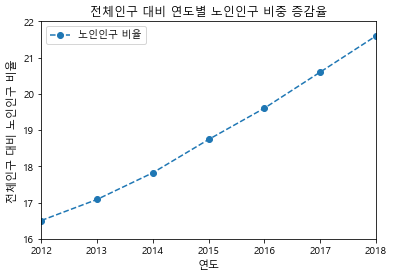

In [202]:
plt.figure()
total_old_per_df.plot(marker='o', ls="--")
plt.xlabel("연도", fontsize=11)
plt.ylabel("전체인구 대비 노인인구 비율", fontsize=11)
plt.title('전체인구 대비 연도별 노인인구 비중 증감율')
plt.ylim(16,22)
plt.xlim=range(2010,2020)

